# # Author:Adil Khan 
# #Objective:To predict the optimum no. of clusters.

In [23]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#Loading data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


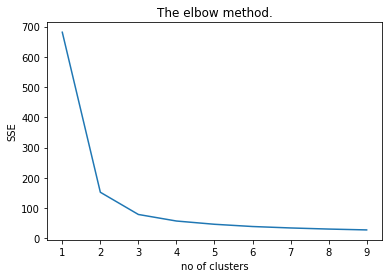

In [34]:
data=iris_df.iloc[:,[0,1,2,3]].values

sse=[]

#finding the value of k.

k_range=range(1,10)
for k in range(1,10):
    kmean=KMeans(n_clusters=k,init='k-means++')
    kmean.fit(data)
    sse.append(kmean.inertia_)

#plotting the values of k to find the optimum value with the help of the elbow method.
plt.plot(range(1,10),sse)
plt.xlabel('no of clusters')
plt.ylabel('SSE')
plt.title('The elbow method.')
plt.show()

# From the above graph we get the value of k as 3

In [41]:
#Using Kmeans on the dataset.
kmean=KMeans(n_clusters=3,init="k-means++",
             max_iter=300,random_state=0)
y_predicted=kmean.fit_predict(data)

In [53]:
iris_df['clusters']=y_predicted
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [55]:
#making a dataset of each cluster.
df1=iris_df[iris_df.clusters==0]
df2=iris_df[iris_df.clusters==1]
df3=iris_df[iris_df.clusters==2]

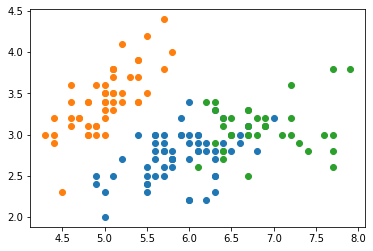

In [63]:
#plotting the first two columns
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'])

# Thank you